In [25]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
import numpy as np
import pandas as pd


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [27]:
data['class'].unique()


array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [28]:
data.isnull().sum()

,0
objid,0
ra,0
dec,0
u,0
g,0
r,0
i,0
z,0
run,0
rerun,0


In [29]:
data.duplicated().sum()

0

In [30]:
data['rerun'].unique()

array([301])

In [31]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [32]:
data['class'] = data['class'].replace({'STAR': 0, 'GALAXY': 1, 'QSO': -1}).infer_objects(copy=False)

data=data.drop('rerun', axis=1)
data.head()

<ipython-input-32-77933e994055>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['class'] = data['class'].replace({'STAR': 0, 'GALAXY': 1, 'QSO': -1}).infer_objects(copy=False)


,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,1,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0,0.000590,3306,54922,512


<Axes: >

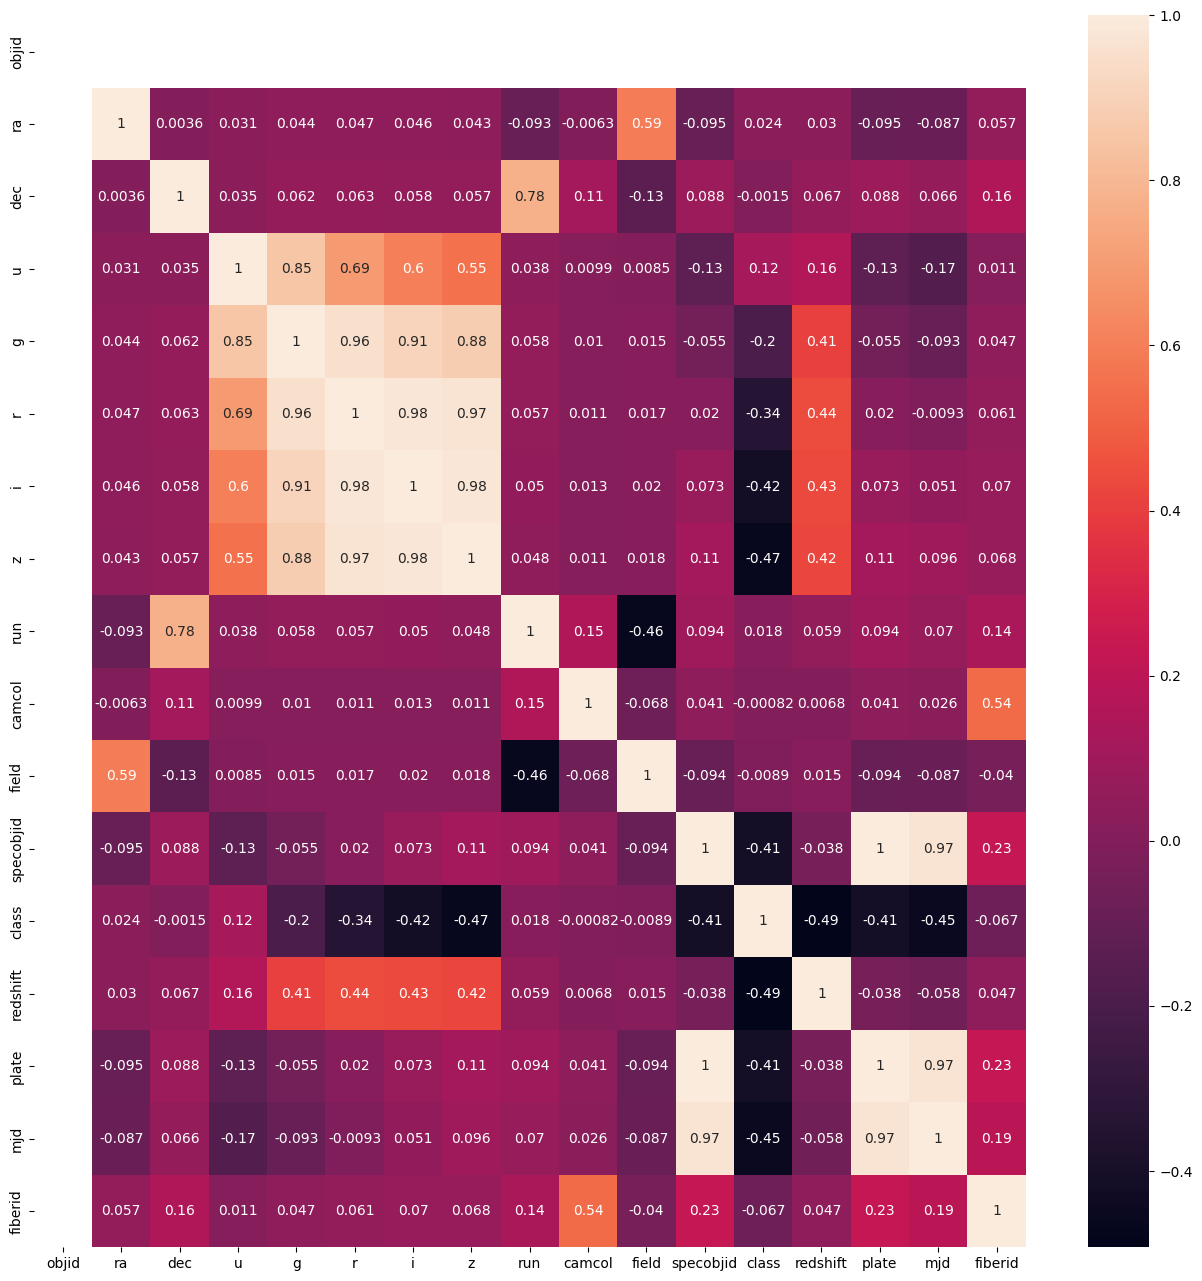

In [33]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True)

In [34]:
x=data.iloc[:,data.columns!='class']
y=data.iloc[:,data.columns=='class']


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.0,0.693832,0.074025,0.980965,0.595954,0.284177,0.219081,0.322108,0.402174,0.6,0.338177,0.373289,0.000770,0.373281,0.566492,0.490490
1,0.0,0.694098,0.074642,0.858250,0.620126,0.343138,0.279811,0.426021,0.402174,0.6,0.338177,0.007006,0.000762,0.006999,0.006268,0.540541
2,0.0,0.694422,0.074519,0.967188,0.757385,0.407640,0.316657,0.462532,0.402174,0.6,0.339498,0.002584,0.023749,0.002579,0.075385,0.512513
3,0.0,0.695175,0.073487,0.722499,0.534197,0.301490,0.248584,0.382616,0.402174,0.6,0.340819,0.373290,0.000751,0.373281,0.566492,0.509510
4,0.0,0.695225,0.074199,0.689960,0.486538,0.323925,0.283858,0.445782,0.402174,0.6,0.340819,0.373290,0.000882,0.373281,0.566492,0.511512


In [36]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   camcol     10000 non-null  int64  
 10  field      10000 non-null  int64  
 11  specobjid  10000 non-null  float64
 12  class      10000 non-null  int64  
 13  redshift   10000 non-null  float64
 14  plate      10000 non-null  int64  
 15  mjd        10000 non-null  int64  
 16  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 1.3 MB


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


16
objid        0.000000
ra           0.011021
dec          0.011913
u            0.036324
g            0.041841
r            0.046065
i            0.044906
z            0.067015
run          0.008386
camcol       0.006025
field        0.010034
specobjid    0.136280
redshift     0.279310
plate        0.132316
mjd          0.159866
fiberid      0.008697
dtype: float64


<Axes: >

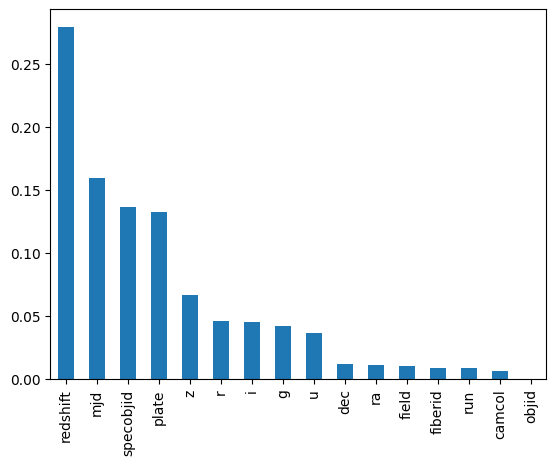

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
col=['objid','ra','dec','u','g','r','i','z','run','camcol','field','specobjid','redshift','plate','mjd','fiberid']
print(len(col))
feature=pd.Series(model.feature_importances_,index=col)
print(feature)
feature.nlargest(16).plot(kind='bar')

In [38]:
# From the analysis we can see  that  objid and rerun has no much siginificance so we can delete it
o=['objid']
x.drop(columns=o,inplace=True)

<ipython-input-38-716506d90851>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns=o,inplace=True)


In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.8)
xtrain.info()
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 3042 to 731
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      8000 non-null   float64
 1   ra         8000 non-null   float64
 2   dec        8000 non-null   float64
 3   u          8000 non-null   float64
 4   g          8000 non-null   float64
 5   r          8000 non-null   float64
 6   i          8000 non-null   float64
 7   z          8000 non-null   float64
 8   run        8000 non-null   float64
 9   camcol     8000 non-null   float64
 10  field      8000 non-null   float64
 11  specobjid  8000 non-null   float64
 12  redshift   8000 non-null   float64
 13  plate      8000 non-null   float64
 14  mjd        8000 non-null   float64
 15  fiberid    8000 non-null   float64
dtypes: float64(16)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 3270 to 3158
Data columns (total 16 columns):
 #   Column     Non-Null Count

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [41]:
LR=LogisticRegression(max_iter=1000)
RF=RandomForestClassifier(n_estimators=1000)
KN=KNeighborsClassifier(5)

In [42]:
LR.fit(xtrain,ytrain)
KN.fit(xtrain,ytrain)
RF.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=1000)

In [43]:
lrp=LR.predict(xtest)
knp=KN.predict(xtest)
rfp=RF.predict(xtest)

In [44]:
from sklearn.metrics import accuracy_score
lra=accuracy_score(ytest,lrp)
kna=accuracy_score(ytest,knp)
rfa=accuracy_score(ytest,rfp)

In [45]:
print("Accuracy achieved  by Logistic Regression",lra*100)
print("Accuracy achieved by KNeighbour Classifier",kna*100)
print("Accuracy achived by Random Forest",rfa*100)

Accuracy achieved  by Logistic Regression 90.2
Accuracy achieved by KNeighbour Classifier 87.6
Accuracy achived by Random Forest 98.85000000000001


In [46]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
print(classification_report(ytest, rfp))

              precision    recall  f1-score   support

          -1       0.97      0.93      0.95       166
           0       0.99      1.00      1.00       838
           1       0.99      0.99      0.99       996

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000



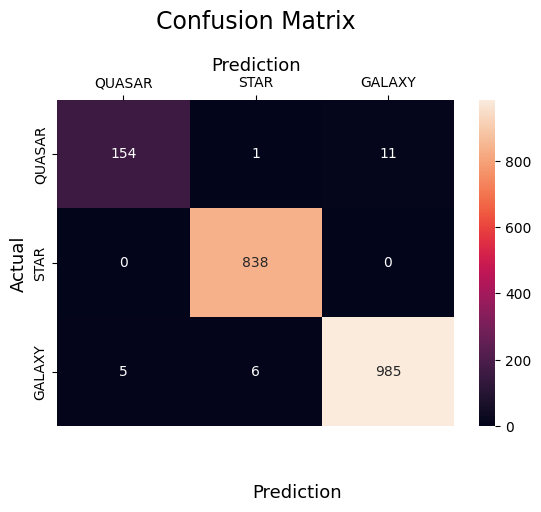

In [47]:
cm=confusion_matrix(ytest,rfp)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['QUASAR','STAR', 'GALAXY'],
            yticklabels=['QUASAR','STAR', 'GALAXY'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()
